In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target

In [3]:
X.shape , Y.shape

((150, 4), (150,))

In [9]:
df = pd.DataFrame(X , columns=iris.feature_names)
df['Species'] = Y

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
new_df = df[df['Species'] != 0][['sepal width (cm)' , 'petal length (cm)' , 'Species']]

In [15]:
new_df.head()

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

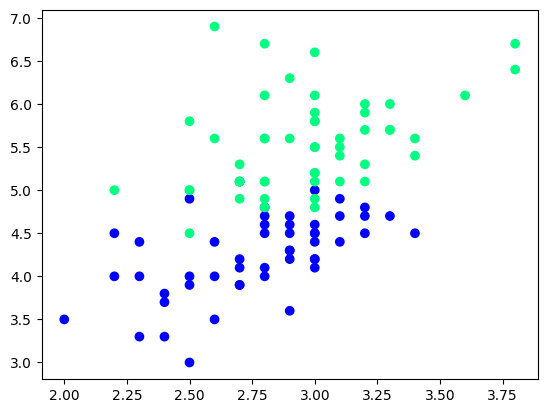

In [17]:
plt.scatter(new_df['sepal width (cm)'] , new_df['petal length (cm)'] , c=new_df['Species'] , cmap='winter')

In [18]:
df = new_df.sample(100)

In [19]:
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [20]:
df_train

,sepal width (cm),petal length (cm),Species
96,2.9,4.2,1
62,2.2,4.0,1
90,2.6,4.4,1
135,3.0,6.1,2
112,3.0,5.5,2
106,2.5,4.5,2
113,2.5,5.0,2
134,2.6,5.6,2
124,3.3,5.7,2
130,2.8,6.1,2


In [21]:
df_val

,sepal width (cm),petal length (cm),Species
121,2.8,4.9,2
145,3.0,5.2,2
63,2.9,4.7,1
104,3.0,5.8,2
92,2.6,4.0,1


In [22]:
df_test

,sepal width (cm),petal length (cm),Species
60,2.0,3.5,1
109,3.6,6.1,2
87,2.3,4.4,1
132,2.8,5.6,2
58,2.9,4.6,1


In [27]:
X_test = df_val.iloc[:,0:2].values
Y_test = df_val.iloc[:,-1].values

In [28]:
X_test

array([[2.8, 4.9],
       [3. , 5.2],
       [2.9, 4.7],
       [3. , 5.8],
       [2.6, 4. ]])

In [29]:
Y_test

array([2, 2, 1, 2, 1])

In [49]:
# Bagging

df_bag = df_train.sample(8 , replace=True)

X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
130,2.8,6.1,2
130,2.8,6.1,2
134,2.6,5.6,2
130,2.8,6.1,2
112,3.0,5.5,2
134,2.6,5.6,2
112,3.0,5.5,2
90,2.6,4.4,1


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


In [51]:
df_bag1 = DecisionTreeClassifier()


In [52]:
def evaluate(clf , X , Y):
    clf.fit(X,Y)
    plot_tree(clf)
    plt.show()
    Y_pred = clf.predict(X_test)
    print(accuracy_score(Y_test , Y_pred))

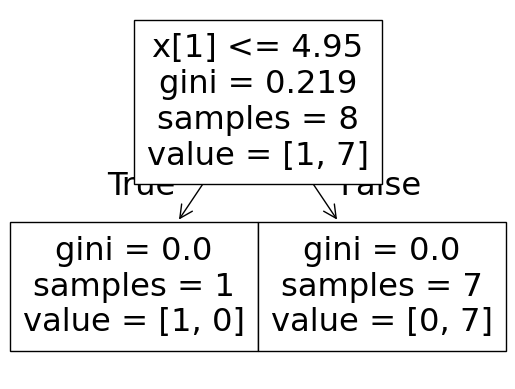

0.8


c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [53]:
evaluate(df_bag1 , X , Y)

In [54]:
# clf 2

df_bag = df_train.sample(8 , replace=True)

X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
112,3.0,5.5,2
112,3.0,5.5,2
113,2.5,5.0,2
106,2.5,4.5,2
112,3.0,5.5,2
124,3.3,5.7,2
96,2.9,4.2,1
134,2.6,5.6,2


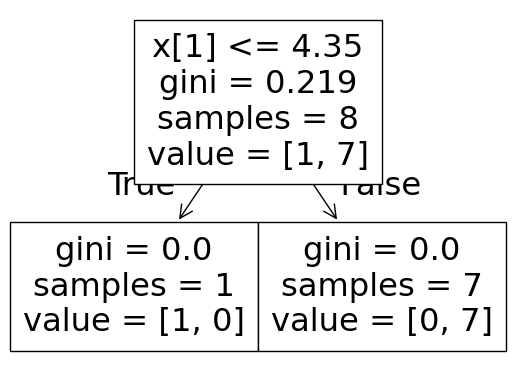

0.8


c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [55]:
df_bag2 = DecisionTreeClassifier()
evaluate(df_bag2 , X , Y)

In [69]:
# Bagging

df_bag = df_train.sample(8 , replace=True)

X = df_bag.iloc[:,0:2]
Y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
106,2.5,4.5,2
124,3.3,5.7,2
62,2.2,4.0,1
134,2.6,5.6,2
96,2.9,4.2,1
62,2.2,4.0,1
135,3.0,6.1,2
130,2.8,6.1,2


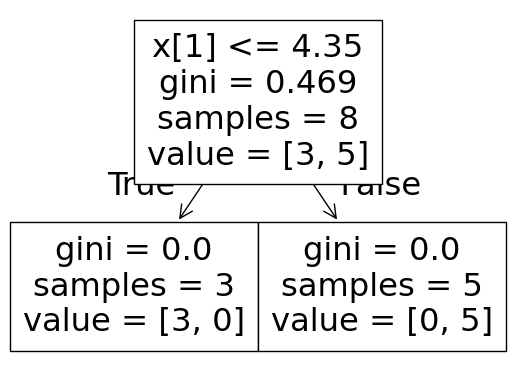

0.8


c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [70]:
df_bag3 = DecisionTreeClassifier()
evaluate(df_bag3 , X , Y)

In [71]:
df_test

,sepal width (cm),petal length (cm),Species
60,2.0,3.5,1
109,3.6,6.1,2
87,2.3,4.4,1
132,2.8,5.6,2
58,2.9,4.6,1


In [74]:
print("prediction 1 : ",df_bag1.predict(np.array([2.8 , 5.6]).reshape(1,2)))
print("prediction 2 : ",df_bag2.predict(np.array([2.8 , 5.6]).reshape(1,2)))
print("prediction 3 : ",df_bag3.predict(np.array([2.8 , 5.6]).reshape(1,2)))

prediction 1 :  [2]
prediction 2 :  [2]
prediction 3 :  [2]


c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\gaurav gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [76]:
# In bagging we do random sampling with replacement 
# Pasting is similar to bagging, only difference being random sample without replacement
# random Subspaces :- In this method, we use column sampling instead of row sampling
# random Patches :- In this methode, we use both row sampling as well as column sampling